### 间隔与支持向量

解决的问题：找到鲁棒性最好的超平面

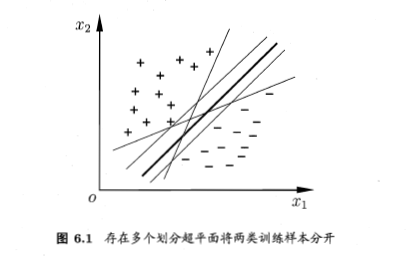

描述划分超平面的线性方程：

$$
w^Tx+b = 0\\
w=(w_1;w_2;..;w_d)为法向量,决定超平面方向;b 为位移项,决定超平面与原点之间的距离。
$$


样本空间中任意点 $x$ 到超平面的距离为：

$$
r = \frac{|w^Tx+b|}{||w||}，
$$

假设对训练样本有 $(x_i,y_i)\in D$ 有：

$$
\begin{cases}
w^Tx_i+b\geq +1,& y_i=+1\\
\\
w^Tx_i+b\leq -1,& y_i=-1\\
\end{cases}
$$

距离最近的这几个训练样本点使上式等号成立，它们被称为"支持向量",两个异类支持向量到超平面的距离之和为：

$$
\gamma = \frac{2}{||w||}
$$
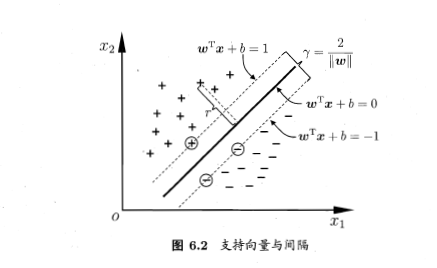

满足 $\gamma$ 最大的参数 $w、b$ 需要满足的以下条件：($SVM 基本型$)

$$
max\frac{2}{||w||} 或 min \frac{1}{2}||w||^2\\
s.t. y_i(w^Tx_i+b)\geq 1, i=1,2,...,m\\
$$

### 对偶问题

>对偶问题是为了更高效的求解 $SVM$ 模型的凸二次规划问题。

做法：对 $SVM$ 使用拉格朗日乘子法即可得到对应的"对偶问题"(dual proplem)


引入拉格朗日乘子：
$$
L(w,b,\alpha)=\frac{1}{2}||w||^2+\sum_{i=1}^{m}\alpha_i (1-y_i(w^Tx_i+b))
$$

令 $L(w,b,\alpha)$ 对 $w$ 和 $b$ 的偏导为零可得：

$$
w = \sum_{i=1}^{m}\alpha_iy_ix_i\\
0 = \sum_{i=1}^{m}\alpha_iy_i\\
$$

代入拉格朗日函数即可得到 **对偶问题**：

$$
max \sum_{i=1}^{m}\alpha_i-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
s.t. \sum_{i=1}^{m}\alpha_iy_i=0\\
\alpha_i\geq 0,i=1,2,...,m\\
$$

于是模型变成：
$$
f(x)=w^Tx+b\\
=\sum_{i=1}^{m}\alpha_iy_ix_i^Tx+b
$$

求解的拉格朗日乘子 $\alpha_i$ 需要满足 $KKT(Karush-Kuhn-Tucker)$ 条件：

$$
\begin{cases}
\alpha_i\geq 0\\
y_if(x_i)-1\geq0\\
\alpha_i(y_if(x_i)-1)=0\\
\end{cases}
$$

为了解决对偶问题，可以使用 $SMO$ 算法。
> $SMO$ 每次选择两个变量 $\alpha_i$ 和 $\alpha_j$ ,并固定其他参数。这样在参数初始化后，不断执行下面两个步骤直至收敛。
- 选取一对需要更新的变量 $\alpha_i$ 和 $\alpha_j$
- 固定 $\alpha_i$ 和 $\alpha_j$ 以外的参数，求解对偶问题获得更新后的 $\alpha_i$ 和 $\alpha_j$

### 核函数

>核函数是为了解决原始样本空间不能线性可分的问题。即可以将原始空间映射到更高维的线性可分的特征空间。然后求解其对偶问题。

令 $\phi(x)$ 表示将 $x$ 映射后的特征向量，于是模型可以表示为：

$$
f(x)=w^T\phi(x)+b
$$

为了计算映射后的对偶问题中涉及的 $\phi(x_i)^T\phi(x_j)$，这里假设了存在这样的**核函数**：

$$
k(x_i,x_j)=<\phi(x_i),\phi(x_j)>=\phi(x_i)^T\phi(x_j)
$$

即在原始样本空间中通过函数 $k(·，·)$ 间接计算高维特征空间的内积。

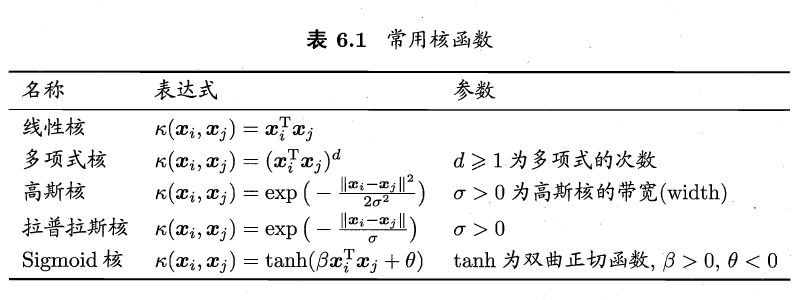

### 软间隔与正则化

>软间隔和正则化 是为了防止过拟合。

优化目标：

$$
min \frac{1}{2}||w||^2+C\sum_{i=1}{m}l_{0/1}(y_i(w^Tx_i+b)-1)
$$

$C>0$ 是一个常数，$l_{0/1}$ 是“0/1”损失函数:
$$
l_{0/1}(z)=\begin{cases}
1,& z<0\\
0,& 其他\\
\end{cases}
$$

损失函数还可以是：

$hinge$ 损失：$L(z)=max(0,1-z)$

指数损失：$L(z)=exp(-z)$

对率损失：$L(z)=log(1+exp(-z))$

### 支持向量回归


### 核方法

···

### example

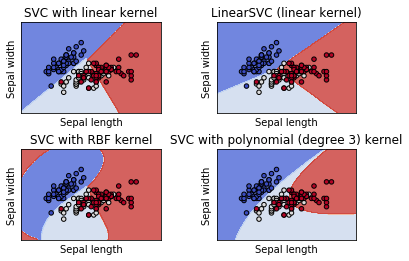

In [7]:
# sklearn 官方示例
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()